# Lab02: Gradient Descent.

- Student ID: 21127191
- Student name: Nguyễn Nhật Truyền

**How to do your homework**


You will work directly on this notebook; the word `TODO` indicate the parts you need to do.

You can discuss ideas with classmates as well as finding information from the internet, book, etc...; but *this homework must be your*.

**How to submit your homework**

Before submitting, rerun the notebook (`Kernel` ->` Restart & Run All`).

Then create a folder named `ID` (for example, if your ID is 1234567, then name the folder `1234567`) Copy file notebook to this folder, compress and submit it on moodle.

**Contents:**
- Gradient descent.

## 1. Loss landscape
![Loss lanscape](img.png) <center>**Figure 1. Loss landscape visualized as a 2D plot. Source: codecamp.vn**<center>

&nbsp;&nbsp;&nbsp;&nbsp; The gradient descent method is an iterative optimization algorithm that operates over a loss landscape (also called an optimization surface).As we can see, our loss landscape has many peaks and valleys based on which values our parameters take on. Each peak is a local maximum that represents very high regions of loss – the local maximum with the largest loss across the entire loss landscape is the global maximum. Similarly, we also have local minimum which represents many small regions of loss. The local minimum with the smallest loss across the loss landscape is our global minimum. In an ideal world, we would like to find this global minimum, ensuring our parameters take on the most optimal possible values.
 
&nbsp;&nbsp;&nbsp;&nbsp;Each position along the surface of the corresponds to a particular loss value given a set of
parameters $\mathbf{W}$ (weight matrix) and $\mathbf{b}$ (bias vector). Our goal is to try different values of $\mathbf{W}$ and $\mathbf{b}$, evaluate their loss, and then take a step towards more optimal values that (ideally) have lower loss.

## 2. The “Gradient” in Gradient Descent

&nbsp;&nbsp;&nbsp;&nbsp;We can use $\mathbf{W}$ and $\mathbf{b}$ and to compute a loss function $L$ or we are able to find our relative position on the loss landscape, but **which direction** we should take a step to move closer to the minimum.

- All We need to do is follow the slope of the gradient $\nabla_{\mathbf{W}}$. We can compute the gradient $\nabla_{\mathbf{W}}$ across all dimensions using the following equation:
$$\dfrac{df\left(x\right)}{dx}=\lim_{h\to0} \dfrac{f\left(x+h\right)-f\left(x\right)}{h}$$
- But, this equation has 2 problems:
    + 1. It’s an *approximation* to the gradient.
    + 2. It’s painfully slow.
    
&nbsp;&nbsp;&nbsp;&nbsp; In practice, we use the **analytic gradient** instead.

## 3. Implementation

### 3.1. Import library

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

### 3.2. Create data

In [2]:
# generate a 2-class classification problem with 1,000 data points, each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.5, random_state=1)
y = y.reshape((y.shape[0], 1))

'''insert a column of 1’s as the last entry in the feature matrix  
-- allows us to treat the bias as a trainable parameter'''
X = np.c_[X, np.ones((X.shape[0]))]

# Split data, use 50% of the data for training and the remaining 50% for testing
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.5, random_state=42)

### 3.3. Training
#### Sigmoid function and derivative of the sigmoid function

In [3]:
def sigmoid_activation(x):
    
    """compute the sigmoid activation value for a given input"""
    #TODO
    sigmoid_value = 1 / (1 + np.exp(-x))
    return sigmoid_value

def sigmoid_deriv(x):
    '''compute the derivative of the sigmoid function ASSUMING
    that the input ‘x‘ has already been passed through the sigmoid
    activation function'''
    #TODO
    sigmoid_value = sigmoid_activation(x)
    sigmoid_derivative = sigmoid_value * (1 - sigmoid_value)
    return sigmoid_derivative


#### Compute output

In [4]:
def compute_h(W, X):
    """
    Compute output: Take the dot product between our features ‘X‘ and the weight
    matrix ‘W‘, then pass this value through our sigmoid activation function 
    """
    #TODO
    z = np.dot(X, W)
    h = sigmoid_activation(z)
    return h
def predict(W, X):
    '''Take the dot product between our features and weight matrix, 
       then pass this value through our sigmoid activation'''
    #TODO
    #preds=?
    
    # apply a step function to threshold the outputs to binary
    # class labels
    z = np.dot(X, W)
    preds = sigmoid_activation(z)
    preds[preds <= 0.5] = 0
    preds[preds > 0] = 1

    return preds

#### Initialize our weight matrix and list of losses

In [5]:
W = np.random.randn(X.shape[1], 1)
losses = []

#### Compute gradient

In [6]:
def compute_gradient(error, h, trainX):
    #TODO 
    """
    The gradient descent update is the dot product between our
    features and the error of the sigmoid derivative of our predictions
    """
    gradient = np.dot(trainX.T, error * sigmoid_deriv(h))
    return gradient

#### Training function 

In [7]:
def train(W,trainX, trainY, learning_rate, num_epochs):
    for epoch in np.arange(0, num_epochs):
        h=compute_h(W,trainX)
        # now that we have our predictions, we need to determine the
        # ‘error‘, which is the difference between our predictions and
        # the true values
        error = h - trainY
        loss = np.sum(error ** 2)
        losses.append(loss)
        gradient=compute_gradient(error, h, trainX)
        W += -learning_rate * gradient
        
        if epoch == 0 or (epoch + 1) % 5 == 0:
            print("Epoch={}, loss={:.7f}".format(int(epoch + 1),loss))
        
    return W

#### Train our model


In [8]:
num_epochs=100
learning_rate=0.01
W=train(W,trainX, trainY, learning_rate, num_epochs)

Epoch=1, loss=258.2404829
Epoch=5, loss=14.5345984
Epoch=10, loss=8.9230284
Epoch=15, loss=6.9477367
Epoch=20, loss=6.2764542
Epoch=25, loss=5.4830083
Epoch=30, loss=4.2858382
Epoch=35, loss=3.1182313
Epoch=40, loss=2.2476485
Epoch=45, loss=1.6111330
Epoch=50, loss=1.1723566
Epoch=55, loss=0.8816972
Epoch=60, loss=0.6902308
Epoch=65, loss=0.5619254
Epoch=70, loss=0.4733088
Epoch=75, loss=0.4098916
Epoch=80, loss=0.3628610
Epoch=85, loss=0.3268102
Epoch=90, loss=0.2983513
Epoch=95, loss=0.2753038
Epoch=100, loss=0.2562242


#### Evaluate result

In [9]:
preds = predict(W, testX)
print(classification_report(testY, preds))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       250
           1       0.99      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



**TODO: Study about accuracy, recall, precision, f1-score.**
- Accuracy: Accuracy is a measure of the overall correctness of the predictions made by a classification model. It calculates the ratio of correctly predicted instances to the total number of instances. The formula for accuracy is:</br>

    Accuracy = (TP + TN) / (TP + TN + FP + FN)</br>
    
    where TP (True Positives) is the number of correctly predicted positive instances </br> TN (True Negatives) is the number of correctly predicted negative instances </br> FP (False Positives) is the number of incorrectly predicted positive instances </br> FN (False Negatives) is the number of incorrectly predicted negative instances.</br>

    Accuracy provides a general assessment of the model's performance, but it can be misleading in imbalanced datasets where the number of instances in different classes is significantly different.</br> </br>
    
- Recall: Recall measures the ability of a classification model to correctly identify positive instances. It calculates the ratio of correctly predicted positive instances to the total number of actual positive instances. The formula for recall is:

    Recall = TP / (TP + FN)
    
    Recall is particularly useful when the cost of false negatives (misclassifying a positive instance as negative) is high. For example, in a medical diagnosis task, recall is important to minimize the number of false negatives, ensuring that patients with a certain condition are not missed.</br> </br>
    
- Precision: Precision measures the accuracy of the positive predictions made by a classification model. It calculates the ratio of correctly predicted positive instances to the total number of predicted positive instances. The formula for precision is:

    Precision = TP / (TP + FP)
    
    Precision is valuable when the cost of false positives (misclassifying a negative instance as positive) is high. For instance, in email spam detection, precision is crucial to minimize the number of false positives, ensuring that legitimate emails are not wrongly classified as spam.</br> </br>
    
- F1: The F1-score is a harmonic mean of precision and recall, providing a balanced measure of a model's performance. It combines both precision and recall into a single metric. The formula for the F1-score is:

    F1-score = 2 * (Precision * Recall) / (Precision + Recall)
    
    The F1-score is useful when there is an uneven distribution of classes or when there is an equal emphasis on both precision and recall. It considers both false positives and false negatives and provides a single value that summarizes the model's performance.

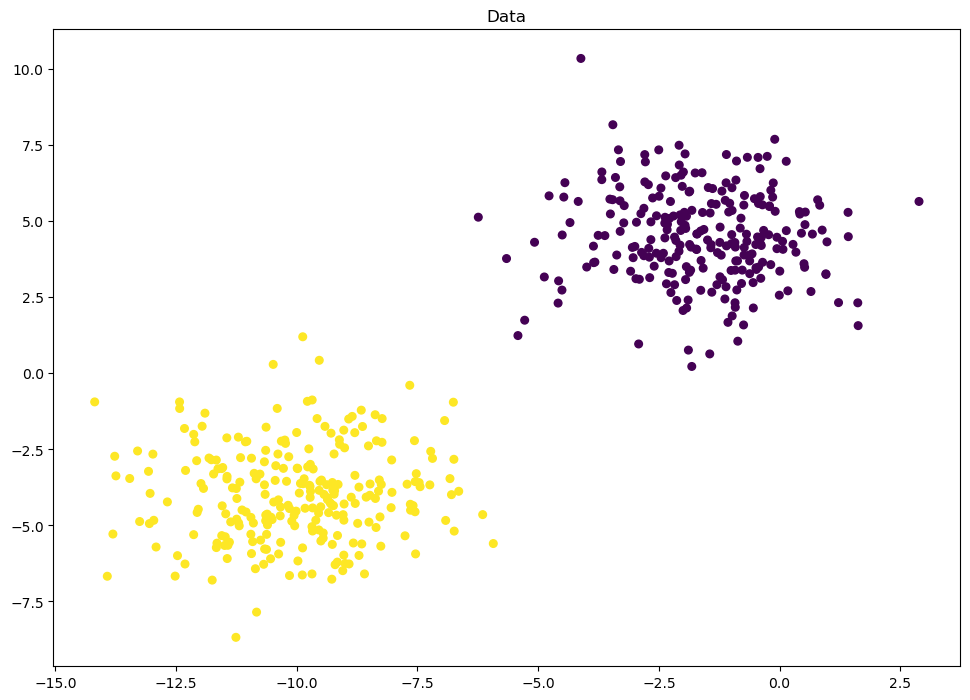

In [10]:
plt.figure(figsize=(11.7,8.27))
plt.title("Data")
plt.scatter(testX[:, 0], testX[:, 1], marker="o", c=testY[:, 0], s=30)

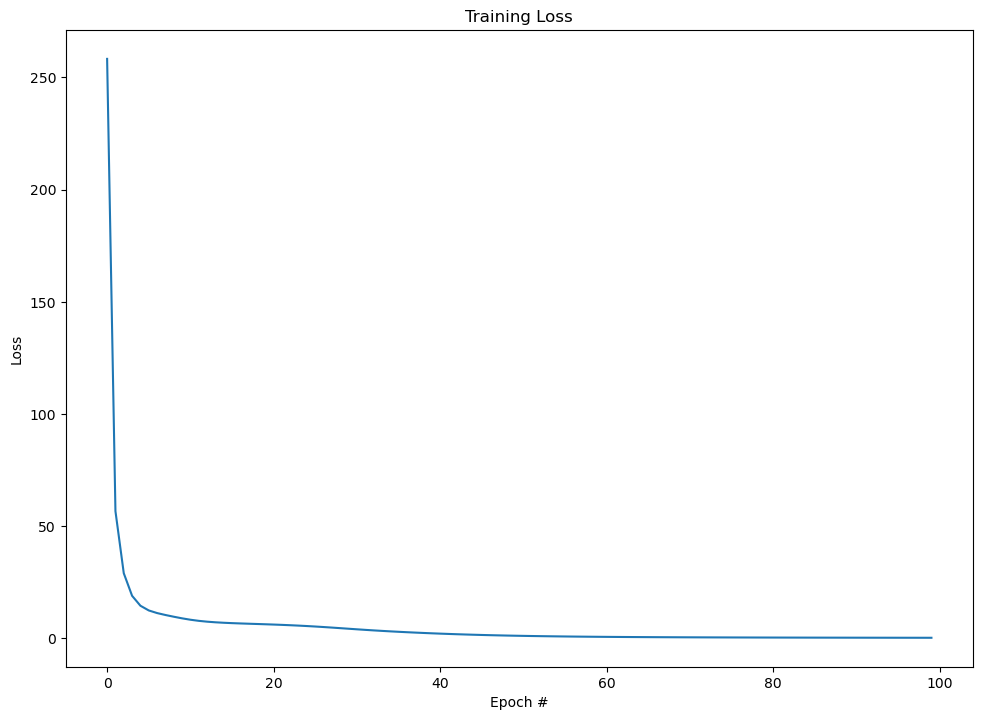

In [11]:
plt.figure(figsize=(11.7,8.27))
plt.plot(range(0, num_epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

**TODO: Try out different learning rates. Give me your observation**

- Small Learning Rate:</br>
Observation: Training converges slowly.</br>
Reasoning: A small learning rate implies small steps in the parameter space. While it is less likely to overshoot the minimum, it requires many iterations to converge, and the training process might get stuck in local minima.</br></br>
- Medium Learning Rate:</br>
Observation: Training converges reasonably fast.</br>
Reasoning: A moderate learning rate strikes a balance between converging quickly and avoiding overshooting the minimum. It is often a good starting point for many optimization problems.</br></br>
- Large Learning Rate:</br>
Observation: Training may not converge, or it oscillates and fails to find the minimum.</br>
Reasoning: A large learning rate can cause the optimization algorithm to overshoot the minimum, preventing convergence. It might result in the model bouncing back and forth across the optimal point.</br></br>